In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('mnist_train.csv')

In [4]:
data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train

array([4, 7, 0, ..., 6, 8, 4], dtype=int64)

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [9]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 6 5 ... 9 5 6] [4 7 0 ... 6 8 4]
0.12410379836946389
Iteration:  10
[3 0 5 ... 5 5 6] [4 7 0 ... 6 8 4]
0.2382413261241716
Iteration:  20
[3 0 0 ... 1 5 4] [4 7 0 ... 6 8 4]
0.3016152816149426
Iteration:  30
[3 0 0 ... 1 5 4] [4 7 0 ... 6 8 4]
0.3640909167951999
Iteration:  40
[4 7 0 ... 1 3 4] [4 7 0 ... 6 8 4]
0.44475330090340515
Iteration:  50
[4 7 0 ... 1 9 4] [4 7 0 ... 6 8 4]
0.49921185104832283
Iteration:  60
[4 7 0 ... 1 9 4] [4 7 0 ... 6 8 4]
0.5342802420380006
Iteration:  70
[4 7 0 ... 1 9 4] [4 7 0 ... 6 8 4]
0.5608230647977084
Iteration:  80
[4 7 0 ... 1 9 4] [4 7 0 ... 6 8 4]
0.5842641400701707
Iteration:  90
[4 7 0 ... 2 9 4] [4 7 0 ... 6 8 4]
0.6030610688316751
Iteration:  100
[4 7 0 ... 2 9 4] [4 7 0 ... 6 8 4]
0.6204003457685724
Iteration:  110
[4 7 0 ... 2 9 4] [4 7 0 ... 6 8 4]
0.6359938304039051
Iteration:  120
[4 7 0 ... 6 9 4] [4 7 0 ... 6 8 4]
0.6513669723215648
Iteration:  130
[4 7 0 ... 6 9 4] [4 7 0 ... 6 8 4]
0.6645705859421346
Iteration:  14

In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


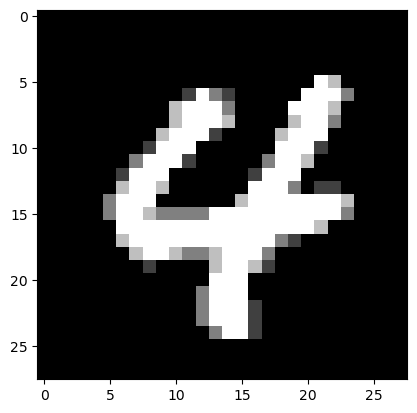

Prediction:  [7]
Label:  7


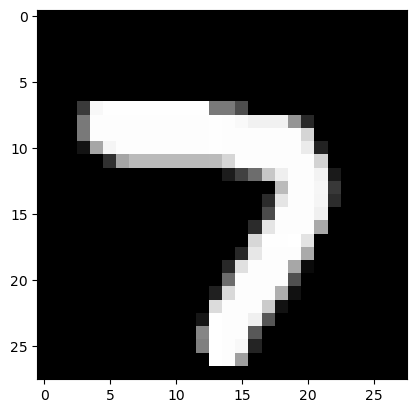

Prediction:  [0]
Label:  0


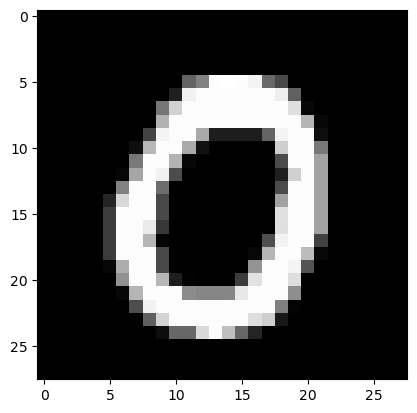

Prediction:  [8]
Label:  8


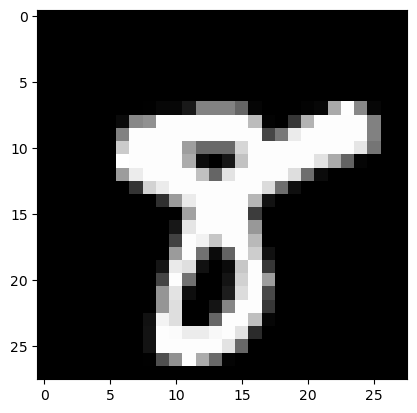

In [11]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [12]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 6 8 9 6 8 4 1 0 3 7 9 6 1 0 8 4 5 7 5 9 2 2 4 5 1 0 8 6 8 0 9 5 0 1 5 8
 6 4 4 5 6 1 3 8 5 3 8 3 9 2 8 3 8 3 2 3 1 9 4 0 3 2 9 5 2 0 6 1 1 6 9 0 6
 9 2 3 7 5 7 2 0 1 0 4 9 2 7 3 3 0 4 0 4 2 6 1 0 0 9 7 0 1 8 6 0 4 3 1 2 3
 2 6 9 3 9 6 9 0 2 3 8 9 3 1 8 8 6 3 3 0 2 6 6 4 1 4 1 8 1 1 7 3 1 6 5 0 6
 9 6 9 3 9 7 6 1 5 6 2 9 7 2 9 8 8 7 6 2 2 3 7 0 2 5 0 9 2 0 7 7 8 2 2 3 0
 2 4 4 4 1 5 1 3 0 0 5 6 0 3 4 9 7 0 2 4 0 5 7 6 1 8 3 8 7 3 3 5 9 7 1 7 2
 4 9 6 6 2 6 0 0 6 1 4 1 8 4 1 7 3 8 4 7 1 3 5 6 2 6 8 1 1 8 1 9 9 9 0 1 7
 0 6 8 2 0 5 9 0 6 0 2 6 1 3 9 4 6 4 8 6 8 9 7 6 3 7 1 2 2 6 1 6 0 9 6 1 5
 7 6 2 2 7 9 5 6 1 3 7 3 2 8 0 5 3 3 9 5 3 9 5 0 0 8 0 6 9 9 1 0 1 1 4 4 3
 5 2 0 1 9 1 7 2 4 7 5 6 8 2 2 6 3 8 5 5 2 6 7 2 8 9 8 4 2 1 3 1 6 7 6 3 3
 1 8 1 8 4 2 6 5 3 6 5 2 6 2 5 2 3 6 1 5 5 2 8 3 2 1 2 0 4 8 9 7 2 1 2 7 3
 1 6 9 2 6 8 7 5 8 9 7 2 4 2 2 3 5 7 9 7 9 1 9 1 6 4 7 2 1 4 3 4 6 4 3 5 7
 3 1 5 3 8 6 7 2 8 0 8 6 1 7 1 6 2 1 6 8 3 2 7 9 3 1 0 4 6 7 6 0 7 5 3 8 9
 0 3 1 2 0 2 1 6 4 8 5 9 

0.837